# House Rent Prediction

###### 1.install the anaconda
###### 2.create the folder on desktop
###### 3.open vs and choose the kernel base(python 3.13)
###### 4.collect the data and kaggle and create the file on vs code
###### 5.we should create a juputer notebook with extension.ipynb
###### 6.at finall markdown

## Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt 
import seaborn as sns

#### read the data

In [69]:
data=pd.read_csv("Hyderabad_House_Data.csv")

In [70]:
data.columns

Index(['Unnamed: 0', 'Bedrooms', 'Washrooms', 'Furnishing', 'Tennants', 'Area',
       'Price', 'Locality'],
      dtype='object')

In [71]:
data.head()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [72]:
data.tail()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH"
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally"
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH"
1170,1170,2 BHK Apartment,2,Semi-Furnished,Bachelors/Family,1100 sqft,"12,000","Umas Aadya and Arha Mensions, Kukatpally, NH"


In [73]:
data.shape

(1171, 8)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1171 non-null   int64 
 1   Bedrooms    1171 non-null   object
 2   Washrooms   1150 non-null   object
 3   Furnishing  1171 non-null   object
 4   Tennants    1170 non-null   object
 5   Area        1149 non-null   object
 6   Price       1171 non-null   object
 7   Locality    1171 non-null   object
dtypes: int64(1), object(7)
memory usage: 73.3+ KB


In [75]:
data.describe()

,Unnamed: 0
count,1171.000000
mean,585.000000
std,338.182889
min,0.000000
25%,292.500000
50%,585.000000
75%,877.500000
max,1170.000000


### Data Pre-Processing

##### checking the null values

In [76]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms     21
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

##### converting null values into numerical

In [77]:
data["Washrooms"]=pd.to_numeric(data["Washrooms"],errors="coerce")

In [78]:
data["Washrooms"] = data["Washrooms"].fillna(data["Washrooms"].median())


In [79]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

In [80]:
data["Tennants"]=pd.to_numeric(data["Tennants"],errors="coerce")

In [81]:
data["Tennants"]=data["Tennants"].fillna(data["Tennants"].median())

In [82]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       0
Area          22
Price          0
Locality       0
dtype: int64

In [83]:
data["Area"]= data["Area"].astype(str).str.extract("(\d+)")

In [84]:
data["Area"] = pd.to_numeric(data["Area"], errors="coerce")

In [85]:
data["Area"] =data["Area"].fillna(data["Area"].median())

In [86]:
data[["Washrooms","Area"]].isnull().sum()

Washrooms    0
Area         0
dtype: int64

In [87]:
data["Price"] = (
    data["Price"]
    .astype(str)
    .str.replace(r"[^\d]","",regex=True)
)

In [88]:
data["Price"]=data["Price"].astype(float)

In [89]:
data["Price"].dtype

dtype('float64')

In [90]:
data["Price"].apply(type).value_counts()

Price
<class 'float'>    1171
Name: count, dtype: int64

In [91]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [92]:
x=pd.get_dummies(x,drop_first=True)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

In [95]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
print(x_train.dtype)
print(y_train.dtype)

float64
float64


In [97]:
y_pred=model.predict(x_test)

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [99]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R^2 SCORE:",r2)

MAE: 5380.8254965378355
MSE: 53398077.5352692
RMSE: 7307.398821418549
R^2 SCORE: 0.5582353072437584


In [100]:
new_house = pd.DataFrame({
    'Area' : [1400],
    'Bedrooms' : [6],
    'Washrooms' : [3]
})

new_house = pd.get_dummies(new_house)
new_house = new_house.reindex(columns=x.columns, fill_value=0)

new_scaled = scaler.transform(new_house)

predicted_price = model.predict(new_scaled)
print("predicted House Price:",predicted_price[0])

predicted House Price: 22059.542898483352


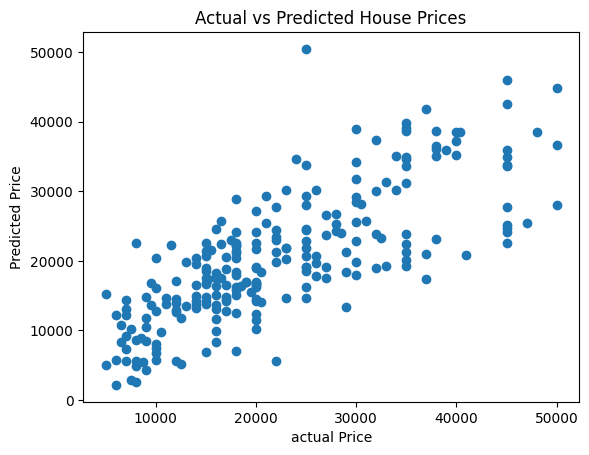

In [101]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual Price")
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [102]:
import pickle

with open("house_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("columns.pkl", "wb") as f:
    pickle.dump(x.columns, f)
